In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
import imageio

In [5]:
d_len = 40
coords = np.linspace(0,1,d_len+1)
#init_dstr = np.random.random(d_len)*np.sin(2*np.pi*coords)
init_dstr = np.sin(coords*5*np.pi)*np.sin(coords*8*np.pi)+1.4*(np.sin(coords*10*np.pi)*np.sin(coords*9*np.pi))
t_steps = 350

In [6]:
def bounce(a):
    di = np.zeros (len(a))
    di [1:-1] = [a[i+1]+a[i-1]-2*a[i] for i in range (1,len(a)-1)]
    #print (np.round(a,2))
    #di[0] = a[0]-a[1]
    #di[-1] = a[-1]-a[-2]
    #print (di)
    a += 0.1* di
    #print (a)
    return a

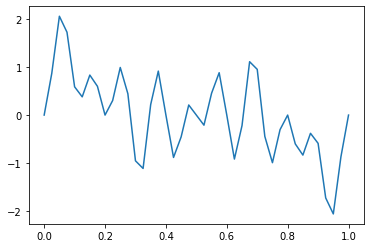

In [7]:
plt.plot(coords,init_dstr)#,coords,bounce(init_dstr))

In [8]:
print (init_dstr[0], init_dstr[-1])

0.0 -2.489601239218684e-30


In [9]:
dsrt = np.copy(init_dstr)
all_dsrt = np.copy(init_dstr).reshape(1,d_len+1)
for fwd in range(t_steps):
    dsrt = bounce(dsrt)
    all_dsrt = np.vstack((all_dsrt,dsrt))

/var/folders/mn/w20y_zw94j54lh9gpndqh2rh0000gn/T/ipykernel_54519/1636782317.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(6,6))


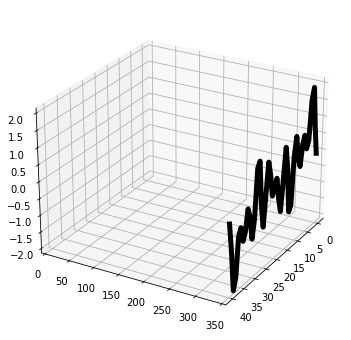

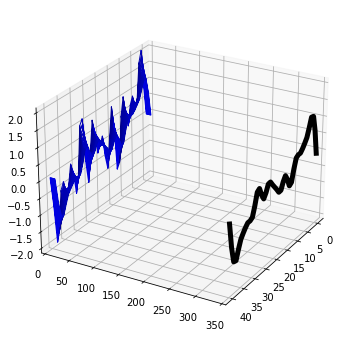

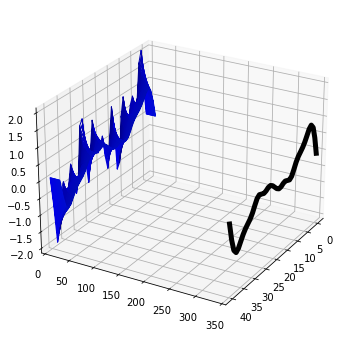

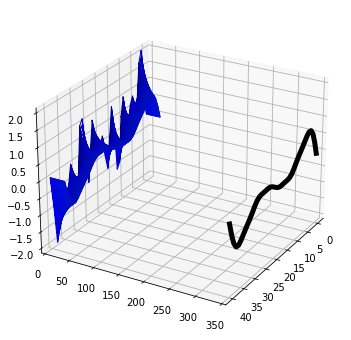

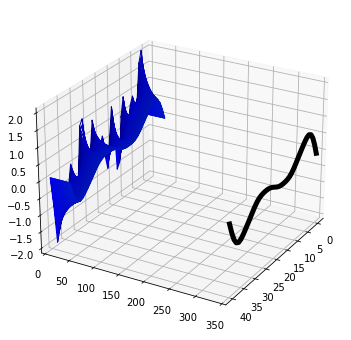

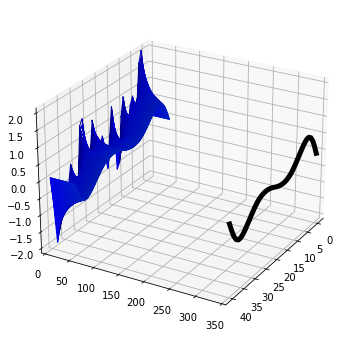

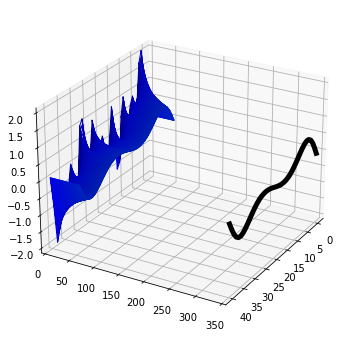

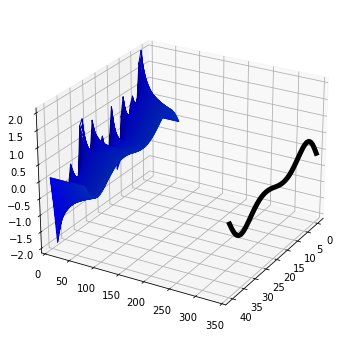

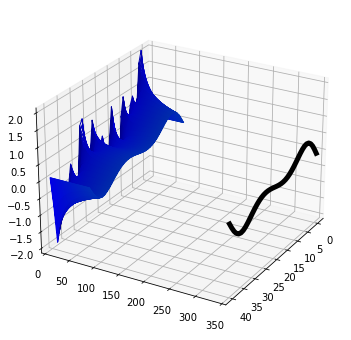

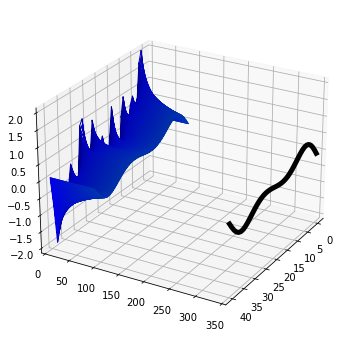

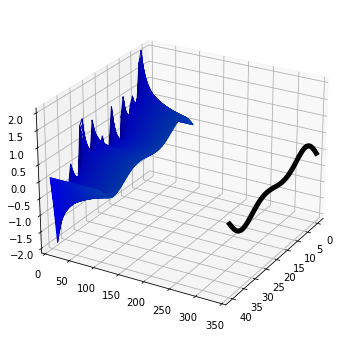

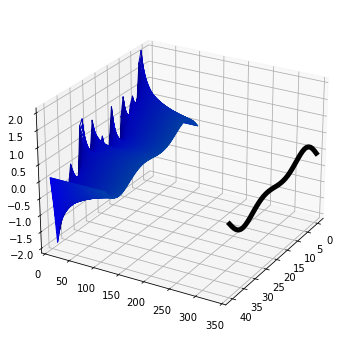

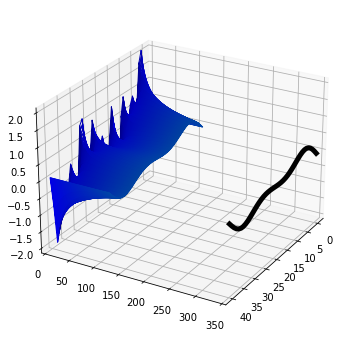

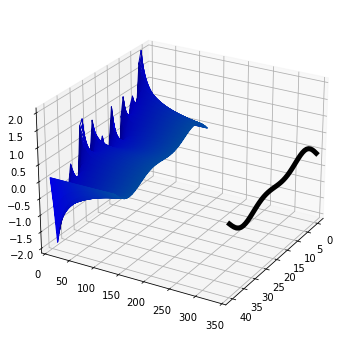

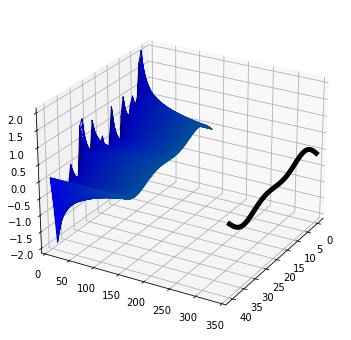

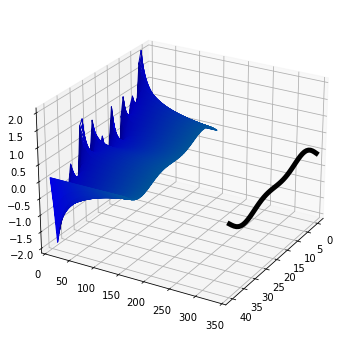

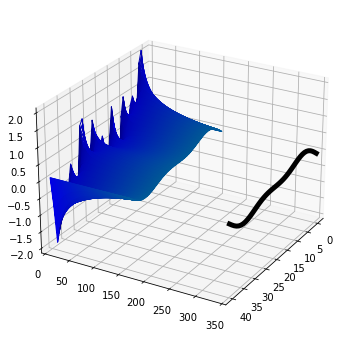

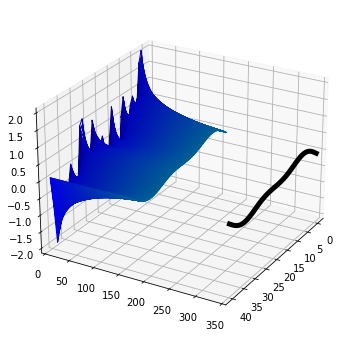

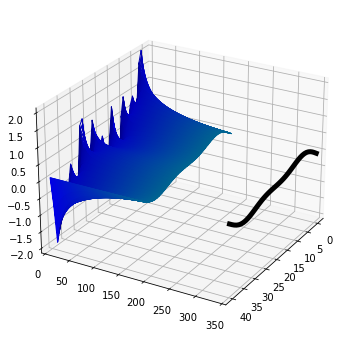

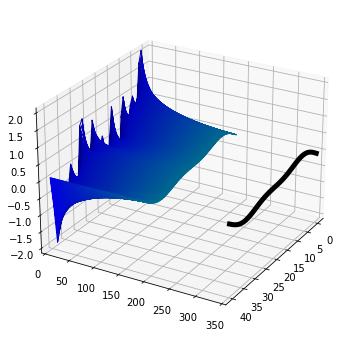

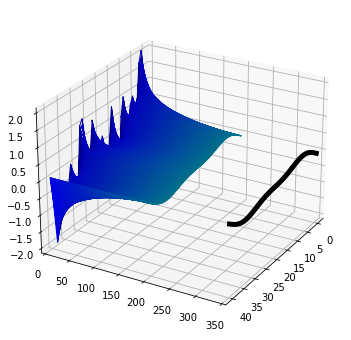

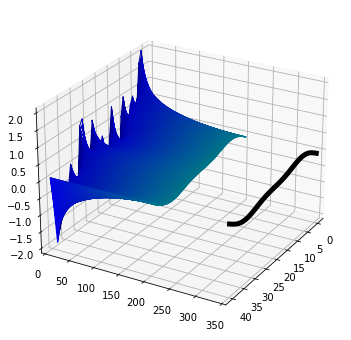

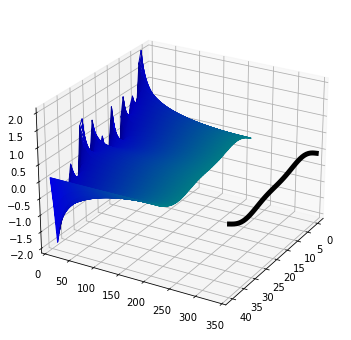

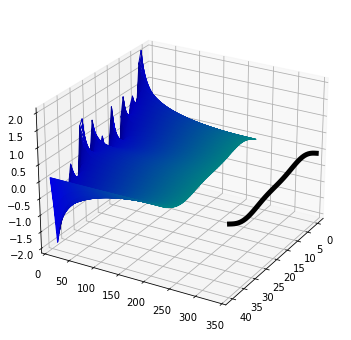

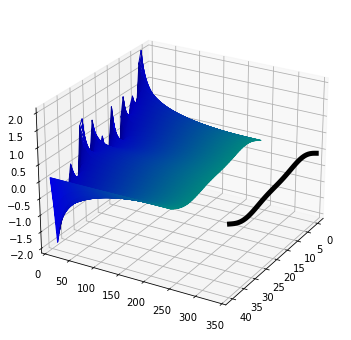

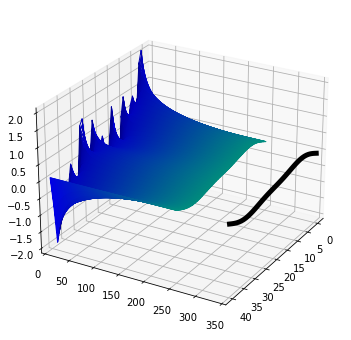

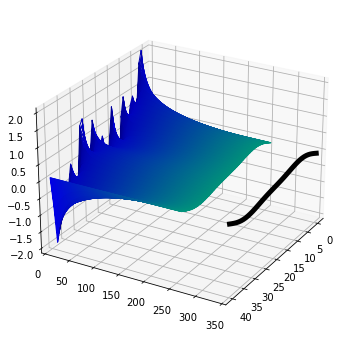

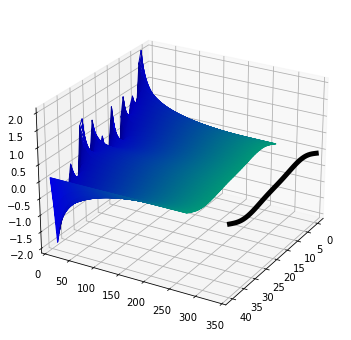

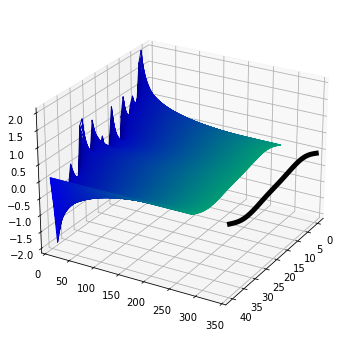

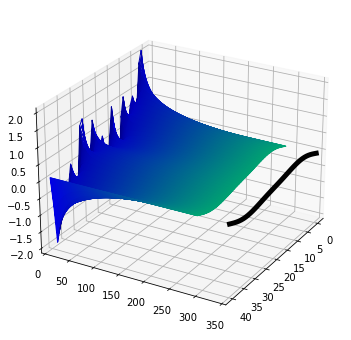

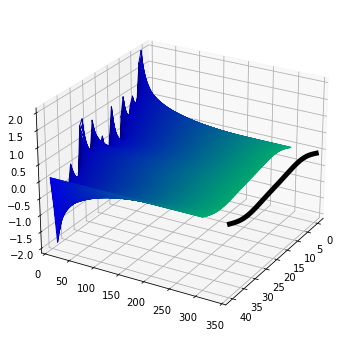

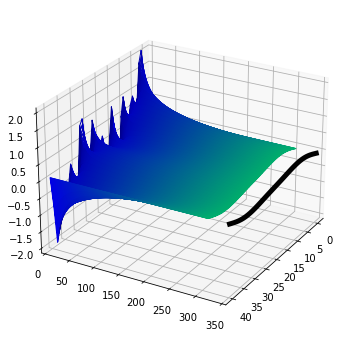

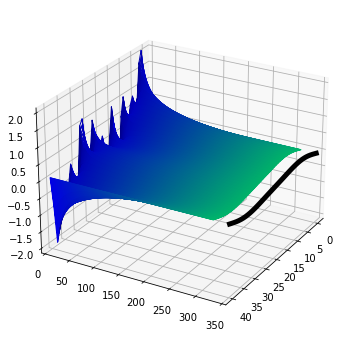

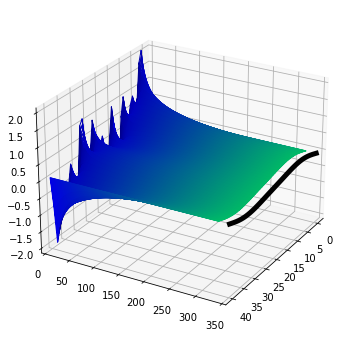

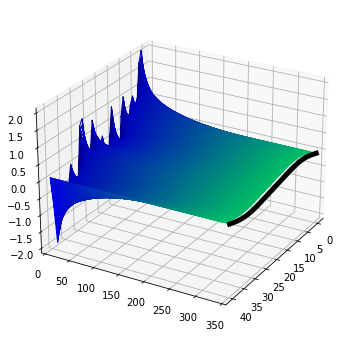

In [10]:
for fwd in range(0,t_steps,10):
    x = np.arange(0,d_len+1,1)
    y = np.arange(0,fwd+1,1)
    X,Y = np.meshgrid(x,y)
    Z = all_dsrt[:fwd+1]

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d',computed_zorder=False)
    plt.ylim(0,t_steps)

    norm = plt.Normalize(1, t_steps)
    colors = cm.winter(norm(Y))
    rcount, ccount, _ = colors.shape


    '''
    ax.plot_surface(X, Y, Z)
    ax.view_init(25, 30)
    '''

    ###Plot a 3D surface
    #ax.plot_wireframe(X, Y, Z, rstride=1, cstride=100)
    #ax.view_init(25, 30)
    
    
    surf = ax.plot_surface(X, Y, Z, rcount=rcount, ccount=ccount,facecolors=colors, shade=True,zorder=0)
    surf.set_facecolor((0,0,0,0))
    ax.view_init(30, 50)
    yy = [t_steps]*(d_len+1)
    ax.plot3D(x, yy, Z[-1], 'k', linewidth = 5,zorder=1)


    ax.view_init(25, 30)
    #plt.pause(0.1)
    plt.savefig(f"tobeadded_{fwd}.png")


with imageio.get_writer('mygif.gif', mode='I') as writer:
    for fwd in range(0,t_steps,10):
        image = imageio.imread(f"tobeadded_{fwd}.png")
        writer.append_data(image)


(41,)
(351,)
(41,)


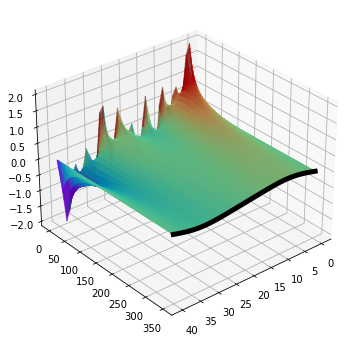

In [12]:

x = np.arange(0,d_len+1,1)
y = np.arange(0,t_steps+1,1)
X,Y = np.meshgrid(x,y)
#R = np.sqrt(X**2 + Y**2)
Z = all_dsrt
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d',computed_zorder=False)

'''ax.plot_surface(X, Y, Z)
ax.view_init(25, 30)
'''

###Plot a 3D surface
#ax.plot_wireframe(X, Y, Z, rstride=5, cstride=100)
#ax.view_init(25, 30)



norm = plt.Normalize(-1,1)#1, t_steps)
colors = cm.rainbow(norm(Z))
rcount, ccount, _ = colors.shape
surf = ax.plot_surface(X, Y, Z, rcount=rcount, ccount=ccount,facecolors=colors, shade=True,zorder=0,alpha=0.5)
surf.set_facecolor((0,0,0,0))
ax.view_init(30, 50)
print (np.shape(Z[-1]))
print (np.shape(y))
y = [t_steps]*(d_len+1)
print (np.shape(x))

ax.plot3D(x, y, Z[-1], 'k', linewidth = 5,zorder=1)



plt.show()

#####       

In [ ]:
np.shape(all_dsrt)

In [ ]:
plt.imshow(all_dsrt, cmap='RdBu', interpolation='nearest')
plt.colorbar()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.axis([0, 10, 0, 1])

for i in range(10):
    y = np.random.random()
    plt.scatter(i, y)
    plt.pause(0.05)

plt.show()

In [ ]:
import time
dstr = np.copy(init_dstr)

figure, ax = plt.subplots(figsize=(4,5))
plt.ion()
plot1, = ax.plot(coords,dstr)

# Labels

plt.xlabel("Length-Axis",fontsize=18)
plt.ylabel("coords-Axis",fontsize=18)
plt.ylim(-1,1)
for value in range(15):
    dstr = bounce(dstr)
    plot1.set_ydata(dstr)
    figure.canvas.draw()
    figure.canvas.flush_events()
    time.sleep(0.1)


plt.show()

# for i in range(10):
#     plt.plot(coords,dstr)
#     dstr = bounce(dstr)
#     plt.pause(0.05)
#     plt.ylim(-1,1)
#     #plt.clear()
# plt.show()

In [ ]:
import time
import pylab as pl
from IPython import display
for i in range(10):
    pl.plot(pl.randn(100))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(1.0)

In [ ]:
dd